In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import umap

/Users/jameslee/coding/mlds-final-project/.venv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jameslee/coding/mlds-final-project/.venv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/jameslee/coding/mlds-final-project/.ven

In [2]:
with open("./data_inputs/expression_mRNA_17-Aug-2014.txt", "r") as f:
    lines = [line.strip().split("\t") for line in f.readlines()]

data = np.array(lines[11:]).transpose()
gene_exp_df = pd.DataFrame(
    data=data[2:, :],  # values
    columns=data[0, :],
)
gene_exp_df.head()

,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Gm20826_loc1,Gm20826_loc2,Gm20877_loc2,Gm20877_loc1,Gm20865_loc4,Gm20738_loc4,Gm20738_loc6,Gm21943_loc1,Gm21943_loc3,Gm20738_loc3
0,0,3,3,0,1,0,0,11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,6,0,1,0,2,25,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,4,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,1,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(lines[7:10]).transpose()[1:, :]
labels_df = pd.DataFrame(data=data[1:, :], columns=data[0, :])

In [4]:
num_features = 19972

gene_exp_df = gene_exp_df.astype(float)
genes_chosen = list(
    gene_exp_df.std(axis=0).sort_values(ascending=False)[:num_features].index
)
genes_chosen_df = gene_exp_df[genes_chosen]
genes_chosen_df

,Malat1,Plp1,Ttr,Sst,Hbb-bs,Npy,Meg3,Calm1,Trf,Hba-a2_loc2,...,Gm5885,Olfr31,Bsnd,Cer1,Sirpb1a,Apoa2,Spaca4,Olfr617,Hoxc4,4930455H04Rik
0,822.0,0.0,0.0,0.0,0.0,172.0,18.0,121.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,869.0,0.0,0.0,0.0,0.0,0.0,28.0,68.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1237.0,1.0,0.0,0.0,0.0,120.0,146.0,117.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1252.0,0.0,0.0,0.0,0.0,0.0,47.0,113.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,271.0,1.0,0.0,0.0,0.0,0.0,5.0,86.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,206.0,0.0,0.0,0.0,0.0,0.0,10.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3001,96.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3002,376.0,0.0,0.0,1.0,0.0,0.0,107.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,303.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
full_df = pd.merge(labels_df, genes_chosen_df, left_index=True, right_index=True)
full_df

interneurons_df = full_df.loc[full_df["level1class"] == "interneurons"]

interneurons_df.head()

,cell_id,level1class,level2class,Malat1,Plp1,Ttr,Sst,Hbb-bs,Npy,Meg3,...,Gm5885,Olfr31,Bsnd,Cer1,Sirpb1a,Apoa2,Spaca4,Olfr617,Hoxc4,4930455H04Rik
0,1772071015_C02,interneurons,Int10,822.0,0.0,0.0,0.0,0.0,172.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1772071017_G12,interneurons,Int10,869.0,0.0,0.0,0.0,0.0,0.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1772071017_A05,interneurons,Int6,1237.0,1.0,0.0,0.0,0.0,120.0,146.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1772071014_B06,interneurons,Int10,1252.0,0.0,0.0,0.0,0.0,0.0,47.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1772067065_H06,interneurons,Int9,271.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
cell_classes = list(set(labels_df.level1class))
print(cell_classes)

cell_classes_map = {}
for idx, cell in enumerate(cell_classes):
    cell_classes_map[cell] = idx

c = [cell_classes_map[cell] for cell in labels_df.level1class]

reducer = umap.UMAP()
embedding = reducer.fit_transform(genes_chosen_df)

['oligodendrocytes', 'microglia', 'interneurons', 'endothelial-mural', 'pyramidal SS', 'pyramidal CA1', 'astrocytes_ependymal']


820


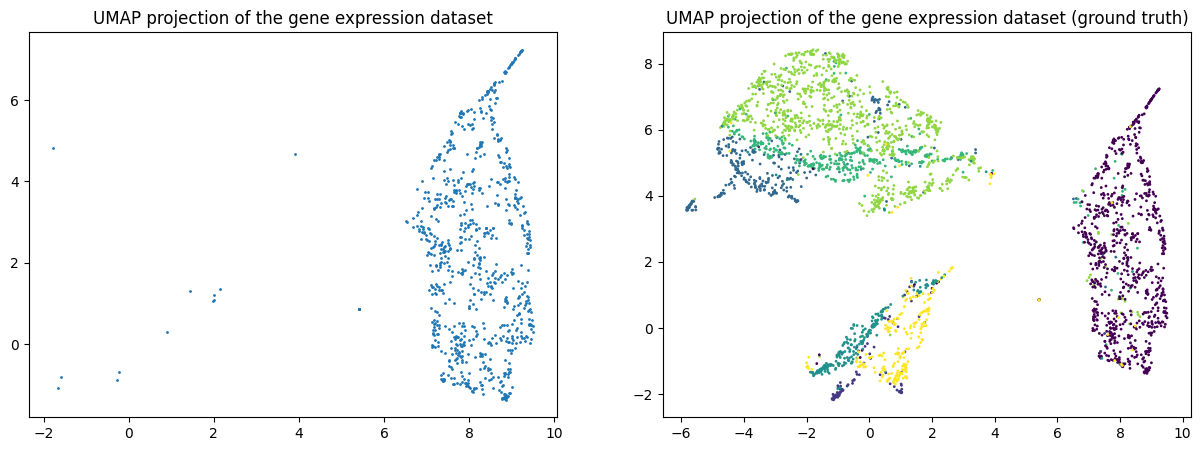

In [7]:
idx = full_df["level1class"] == "oligodendrocytes"
print(sum(idx))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(embedding[idx, 0], embedding[idx, 1], s=1)
ax[0].set_title("UMAP projection of the gene expression dataset", fontsize=12)
ax[1].scatter(embedding[:, 0], embedding[:, 1], s=1, c=c)
ax[1].set_title(
    "UMAP projection of the gene expression dataset (ground truth)", fontsize=12
)
plt.show()
fig.savefig("umap.svg")

# also try with first 2 principal components

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = genes_chosen_df.to_numpy()
scaler = StandardScaler()
X_standardised = scaler.fit_transform(X)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_standardised)

In [9]:
pc_df = pd.DataFrame(pcs, columns=["PC1", "PC2"])
pc_df["labels"] = full_df["level1class"]
pc_df.to_csv("./data_inputs/scrnaseq_pc_df.csv", index=False)

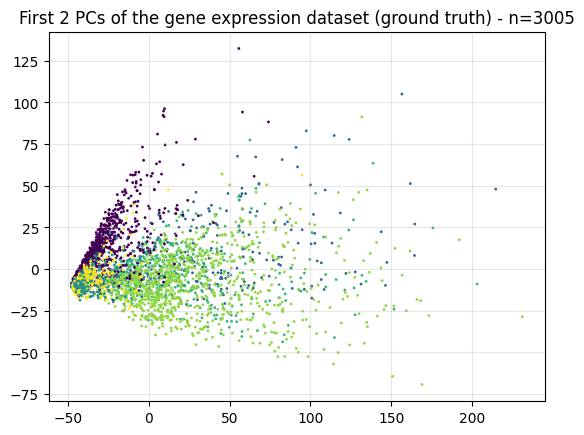

In [10]:
import h5py

fig, ax = plt.subplots()
ax.scatter(pcs[:, 0], pcs[:, 1], s=1, c=c)
ax.set_title(
    f"First 2 PCs of the gene expression dataset (ground truth) - n={len(idx)}",
    fontsize=12,
)
ax.grid(alpha=0.3)
plt.show()
fig.savefig(f"all_pcs.pdf", dpi=600)

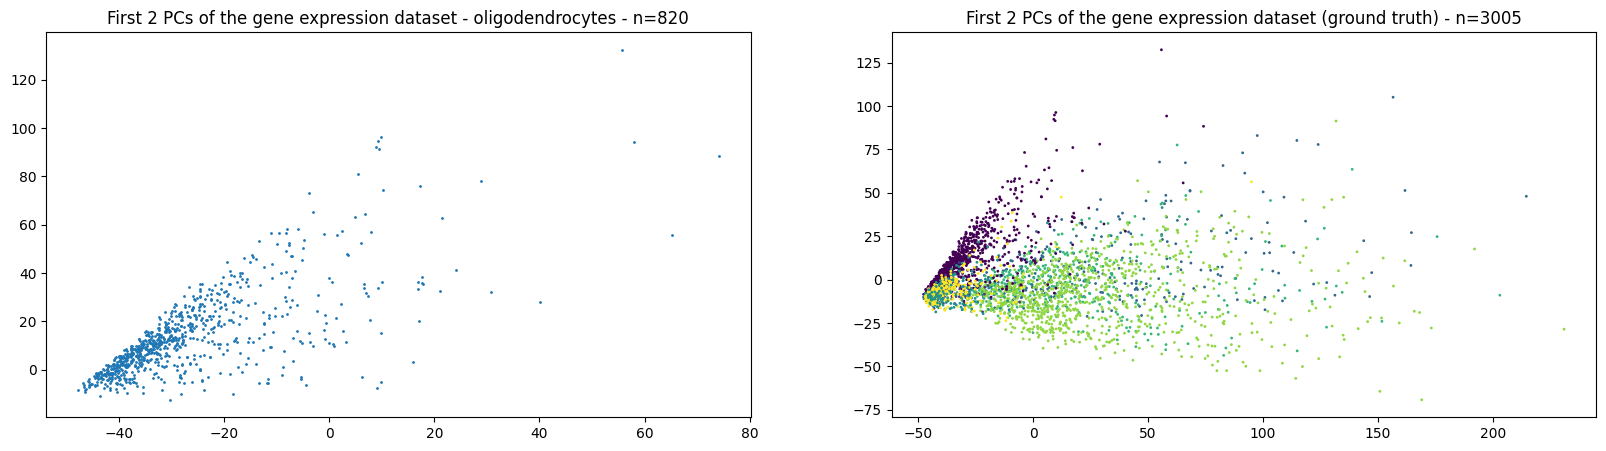

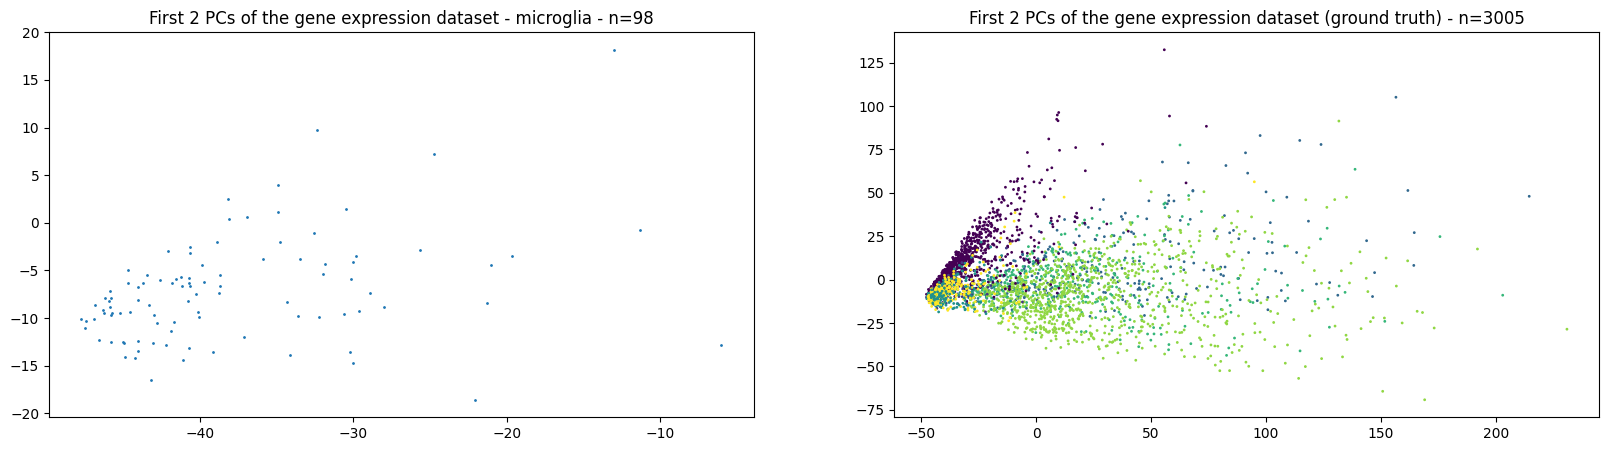

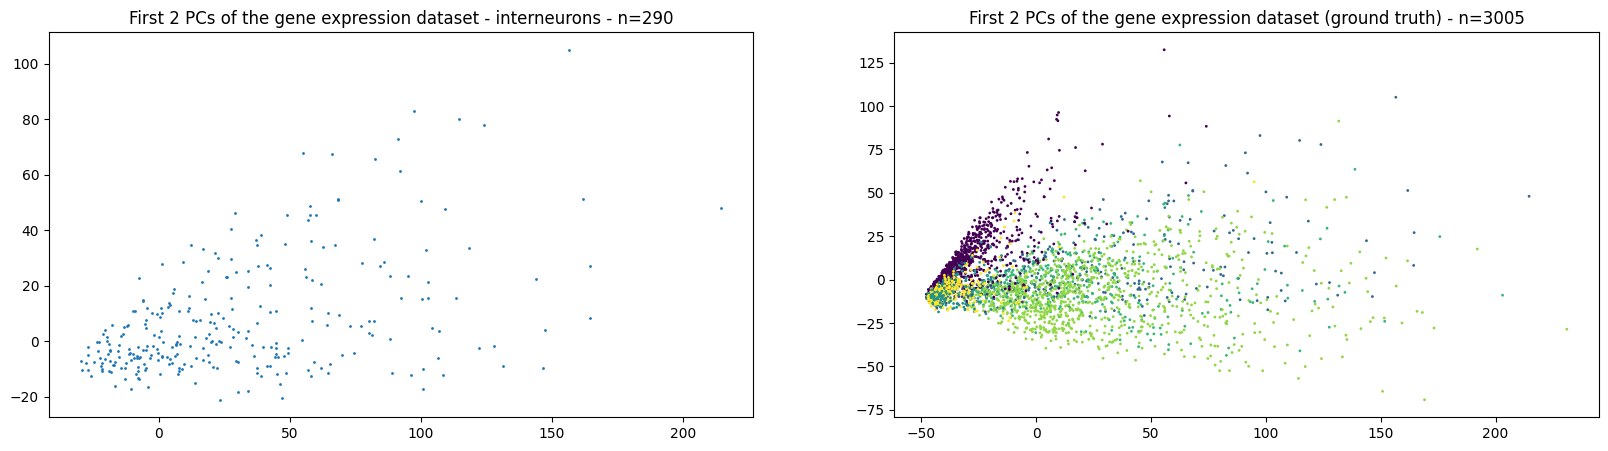

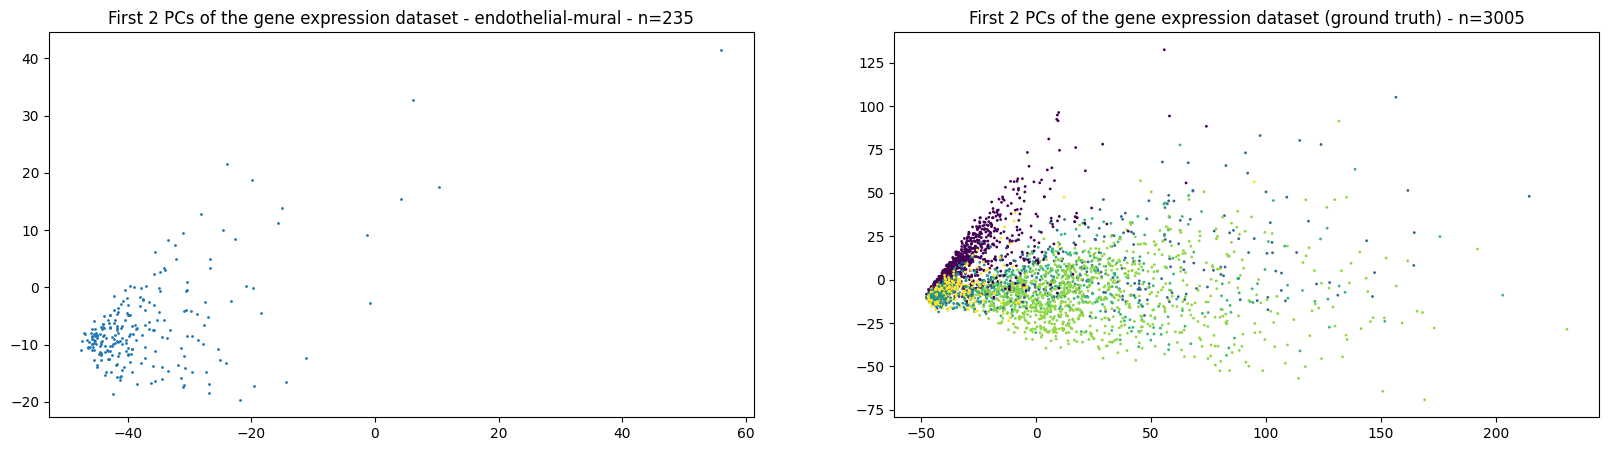

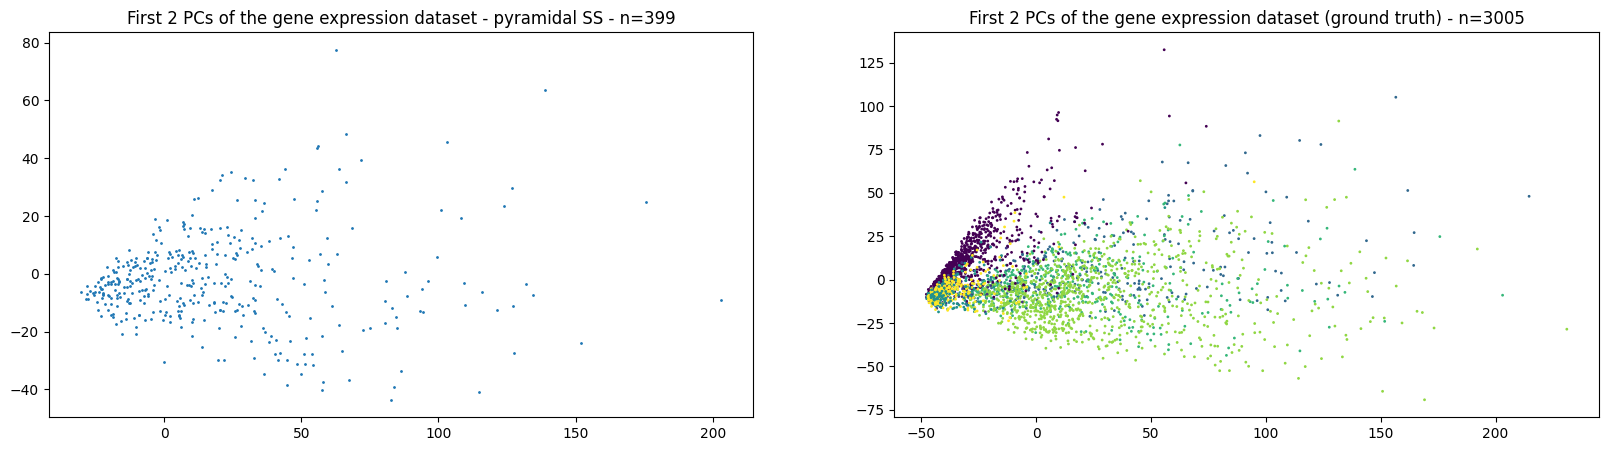

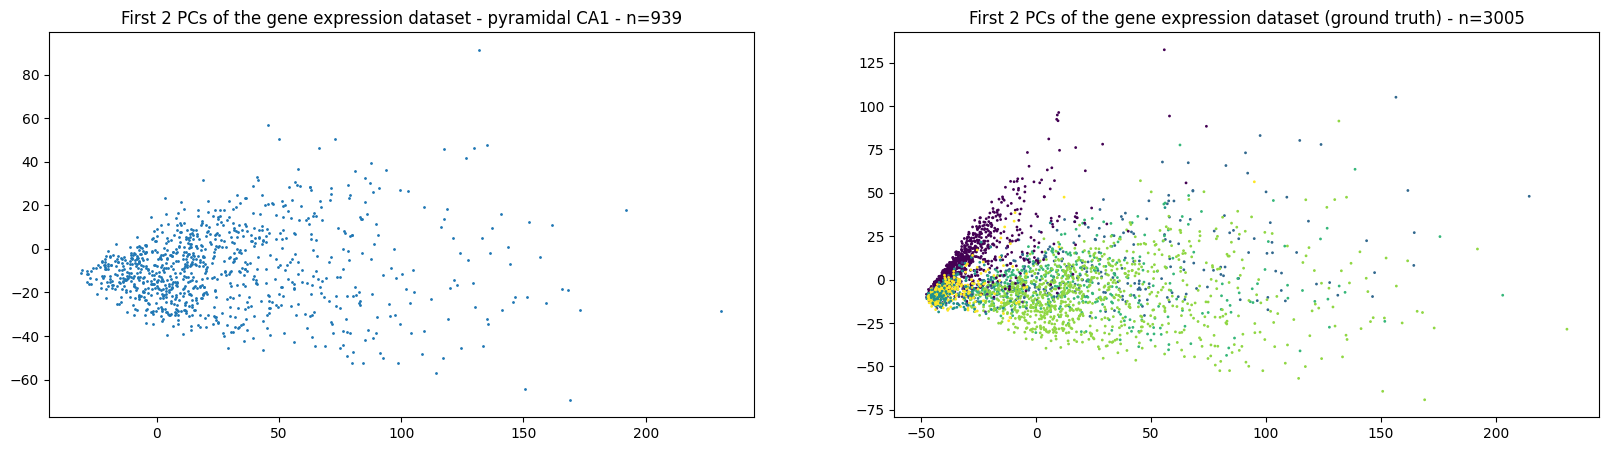

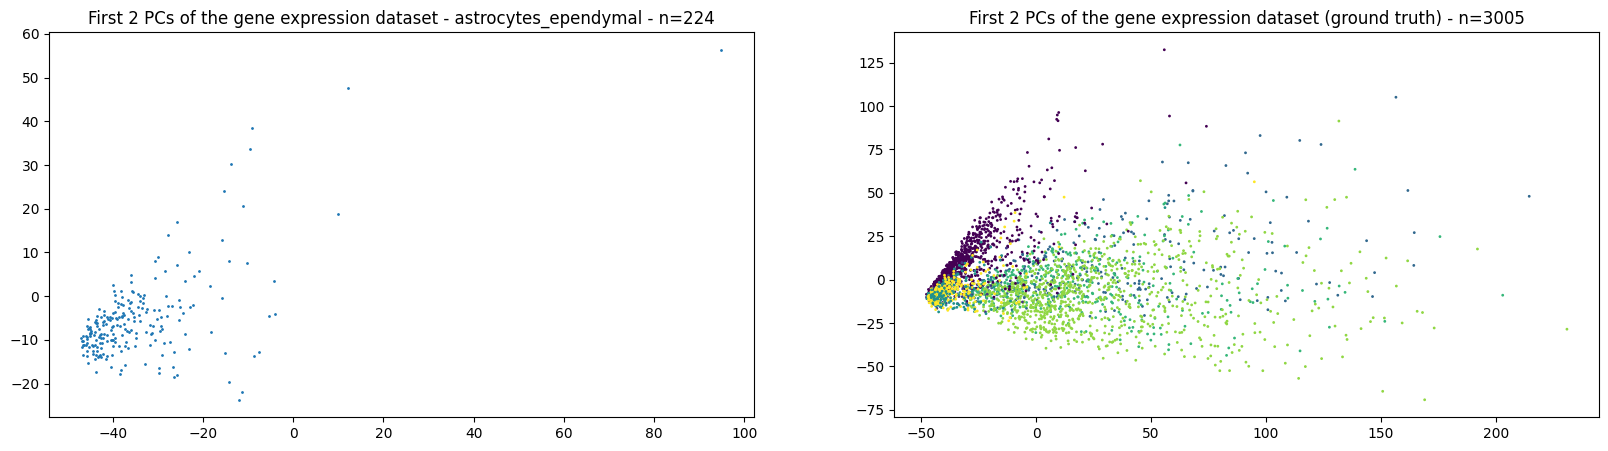

In [11]:
for cell_class in cell_classes:
    idx = full_df["level1class"] == cell_class

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    ax[0].scatter(pcs[idx, 0], pcs[idx, 1], s=1)
    ax[0].set_title(
        f"First 2 PCs of the gene expression dataset - {cell_class} - n={sum(idx)}",
        fontsize=12,
    )
    ax[1].scatter(pcs[:, 0], pcs[:, 1], s=1, c=c)
    ax[1].set_title(
        f"First 2 PCs of the gene expression dataset (ground truth) - n={len(idx)}",
        fontsize=12,
    )
    plt.show()
    fig.savefig(f"{cell_class}.png")

for cell_class in cell_classes:
    idx = full_df["level1class"] == cell_class
    cell_pcs = pcs[idx, :]
    np.random.shuffle(cell_pcs)
    h5f = h5py.File(f"./data_inputs/{cell_class}.jld", "w")
    h5f.create_dataset("data", data=cell_pcs)

### Create dataset from scRNA-seq data
